<a href="https://colab.research.google.com/github/Rsorianoclever/5to-Examen-Codea-UNI/blob/main/modulo4_analisis_exploratorio/Advanced_Data_Cleaning_and_Feature_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://posgrado.utec.edu.pe/sites/default/files/2023-08/Testimonial-home-2.jpg" alt="HTML5 Icon" width="900" height="250" >

# **Laboratorio: Advanced Data Cleaning and Feature Transformation with House Prices Dataset**

---

## **Objetivo general**

Aplicar técnicas avanzadas de limpieza de datos, codificación de variables categóricas, discretización y transformaciones numéricas (incluyendo polinómicas) sobre un dataset real para preparar la información antes del modelado.


## **1. Introducción teórica**

En cualquier proyecto de ciencia de datos, **la etapa de preprocesamiento puede ocupar hasta el 80% del tiempo total.** Esto se debe a que los datos rara vez vienen listos para usarse: suelen tener errores, valores faltantes, formatos inconsistentes y escalas incompatibles.


La limpieza avanzada no se limita a eliminar nulos o duplicados, sino que abarca tareas más profundas como:


- Detectar inconsistencias semánticas (mismo valor escrito de forma distinta).

- Estandarizar formatos (fechas, unidades de medida, codificación de texto).

- Identificar y tratar outliers que afectan análisis y modelos.

- Aplicar transformaciones matemáticas para mejorar la distribución de las variables y la capacidad predictiva de los modelos.

## **2. Carga y exploración inicial del dataset**

Usaremos el dataset House Prices – Advanced Regression Techniques de Kaggle.

In [4]:
import pandas as pd

# Cargar datos
df = pd.read_csv('train.csv')

# Dimensiones y primeras filas
print(df.shape)
df.head()

# Información general
df.info()

# Resumen estadístico
df.describe()


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **3. Limpieza avanzada de datos**



**3.1 Detección de valores faltantes**

In [5]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Aquí detectamos columnas con valores faltantes. Algunos datasets codifican los nulos como “NA” o “0” en lugar de NaN, por lo que también conviene revisar valores únicos por columna.

**3.2 Imputación de valores**



Numéricos – usando la mediana para evitar el efecto de outliers:

In [6]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
df['LotFrontage'] = num_imputer.fit_transform(df[['LotFrontage']])


Categóricos – usando la moda o creando una categoría “Missing”:

In [7]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df['MasVnrType'] = cat_imputer.fit_transform(df[['MasVnrType']]).flatten()

> Usar media puede distorsionar si hay valores extremos.
>
> Usar mediana es más robusto frente a outliers.
>
> Para categóricos, asignar “Missing” puede conservar la información de que el valor no estaba registrado.

**3.3 Corrección de inconsistencias de formato**

In [8]:
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()


Esto asegura consistencia en mayúsculas/minúsculas y elimina espacios extra.



**3.4 Duplicados exactos y casi-duplicados**


In [9]:
df.drop_duplicates(inplace=True)


**3.5 Outliers**

Usaremos el rango intercuartílico (IQR):

In [10]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['SalePrice'] < Q1 - 1.5*IQR) | (df['SalePrice'] > Q3 + 1.5*IQR)]
outliers.shape


(61, 81)

Outliers detectados no siempre deben eliminarse: en precios de casas, un valor alto puede ser legítimo.

## **4. Codificación de variables categóricas**

**4.1 One-Hot Encoding**

Convierte categorías en columnas binarias.

In [11]:
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)


**4.2 Label Encoding**

Asigna un número entero a cada categoría (útil para variables ordinales).

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Street'] = le.fit_transform(df['Street'])


In [13]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


**4.3 Target Encoding (avanzado, riesgo de data leakage)**

In [14]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['MSZoning'])
df['MSZoning'] = te.fit_transform(df['MSZoning'], df['SalePrice'])


## **5. Discretización de variables continuas**

Reduce una variable continua a intervalos o “bins”.

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['SalePrice_bin'] = kb.fit_transform(df[['SalePrice']])


Útil cuando queremos reducir la sensibilidad del modelo a variaciones pequeñas o cuando la variable tiene relación no lineal con la respuesta.

## **6. Transformaciones numéricas avanzadas**


**6.1 Transformación logarítmica**


Reduce asimetría en variables sesgadas a la derecha.

In [16]:
import numpy as np
df['SalePrice_log'] = np.log1p(df['SalePrice'])


**6.2 Min–Max Scaling**

Escala los valores a un rango fijo [0, 1].

In [17]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df[['LotArea_mm', 'GrLivArea_mm']] = mm_scaler.fit_transform(df[['LotArea', 'GrLivArea']])


**6.3 Z-score Standardization**

Centra en media 0 y desv. estándar 1.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['LotArea_z', 'GrLivArea_z']] = scaler.fit_transform(df[['LotArea', 'GrLivArea']])


**6.4 Transformaciones polinómicas**

Genera nuevas variables como combinaciones polinómicas de las existentes.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['GrLivArea', 'LotArea']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'LotArea']))

df = pd.concat([df, poly_df], axis=1)


Útil para modelos lineales que no capturan interacciones o curvaturas de forma natural. Ojo: puede aumentar mucho la dimensionalidad.

## **7. Evaluación visual del impacto**


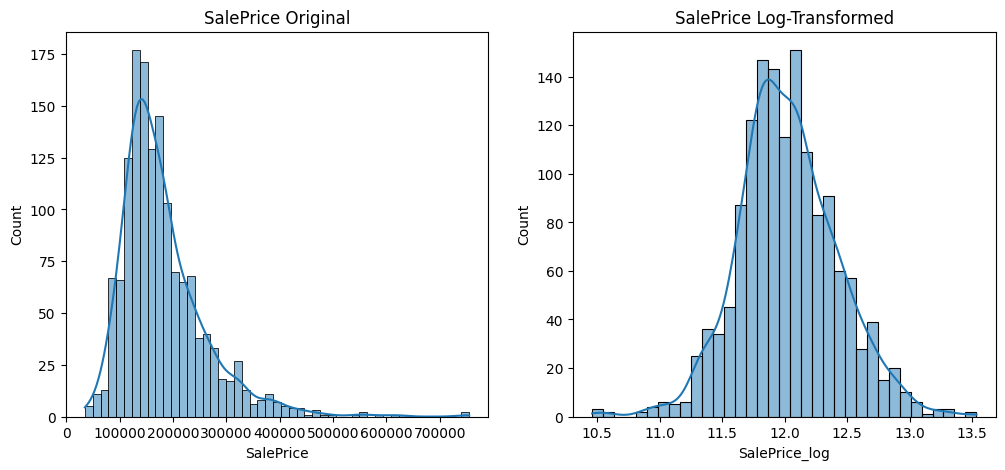

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['SalePrice'], ax=axes[0], kde=True)
axes[0].set_title("SalePrice Original")
sns.histplot(df['SalePrice_log'], ax=axes[1], kde=True)
axes[1].set_title("SalePrice Log-Transformed")
plt.show()


## **Tarea**

- Identificar y corregir inconsistencias en otra columna categórica.

- Imputar una variable numérica usando media, mediana y KNN, y comparar resultados.

- Comparar One-Hot Encoding vs. Target Encoding en términos de número de columnas y posible overfitting.

- Discretizar LotArea usando equal-width binning.

- Generar transformaciones polinómicas de grado 3 para tres variables numéricas y evaluar cuántas columnas nuevas produce.

---

# Gracias por completar este laboratorio!

---


Identificar y corregir inconsistencias en otra columna categórica.

In [27]:
print("Valores unicos en Exterior1st antes de limpieza:")
print(df['Exterior1st'].unique())

df['Exterior1st'] = df['Exterior1st'].str.strip().str.title()

print("\nValores unicos en Exterior1st despeus de limpieza:")
print(df['Exterior1st'].unique())

Valores unicos en Exterior1st antes de limpieza:
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Valores unicos en Exterior1st despeus de limpieza:
['Vinylsd' 'Metalsd' 'Wd Sdng' 'Hdboard' 'Brkface' 'Wdshing' 'Cemntbd'
 'Plywood' 'Asbshng' 'Stucco' 'Brkcomm' 'Asphshn' 'Stone' 'Imstucc'
 'Cblock']


Imputar una variable numérica usando media, mediana y KNN, y comparar resultados.

Estadisticas descriptivas para LotFrontage luego de Mean Imputation:
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
dtype: float64

Estadisticas descriptivas para LotFrontage luego de Median Imputation:
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
dtype: float64

Estadisticas descriptivas para LotFrontage luego de KNN Imputation:
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
dtype: float64


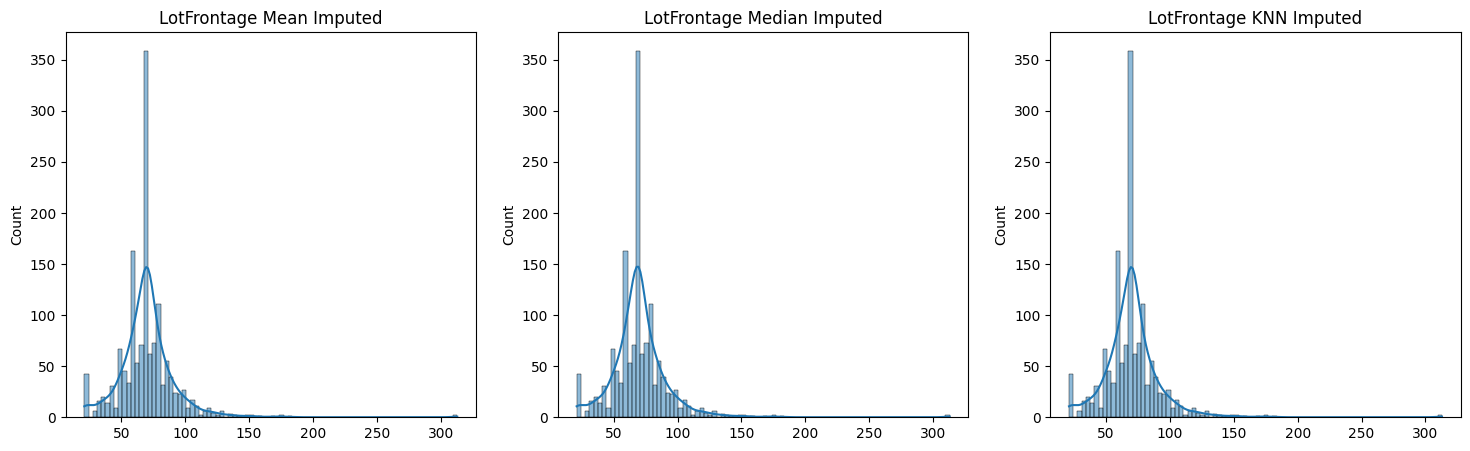

In [30]:

df_mean_imputed = df['LotFrontage'].copy()
df_median_imputed = df['LotFrontage'].copy()
df_knn_imputed = df['LotFrontage'].copy()

mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = mean_imputer.fit_transform(df_mean_imputed.values.reshape(-1, 1))

median_imputer = SimpleImputer(strategy='median')
df_median_imputed = median_imputer.fit_transform(df_median_imputed.values.reshape(-1, 1))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lot_frontage_scaled = scaler.fit_transform(df['LotFrontage'].values.reshape(-1, 1))

knn_imputer = KNNImputer(n_neighbors=5)
lot_frontage_knn_imputed_scaled = knn_imputer.fit_transform(lot_frontage_scaled)

df_knn_imputed = scaler.inverse_transform(lot_frontage_knn_imputed_scaled)


print("Estadisticas descriptivas para LotFrontage luego de Mean Imputation:")
print(pd.Series(df_mean_imputed.flatten()).describe())

print("\nEstadisticas descriptivas para LotFrontage luego de Median Imputation:")
print(pd.Series(df_median_imputed.flatten()).describe())

print("\nEstadisticas descriptivas para LotFrontage luego de KNN Imputation:")
print(pd.Series(df_knn_imputed.flatten()).describe())

#plot

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_mean_imputed.flatten(), ax=axes[0], kde=True)
axes[0].set_title("LotFrontage Mean Imputed")
sns.histplot(df_median_imputed.flatten(), ax=axes[1], kde=True)
axes[1].set_title("LotFrontage Median Imputed")
sns.histplot(df_knn_imputed.flatten(), ax=axes[2], kde=True)
axes[2].set_title("LotFrontage KNN Imputed")
plt.show()

Comparar One-Hot Encoding vs. Target Encoding en términos de número de columnas y posible overfitting.


In [38]:
import pandas as pd
import category_encoders as ce

# Reload data to have the original 'MSZoning' column
df_encoded_comparison = pd.read_csv('train.csv')

print("--- One-Hot Encoding ---")
print(f"Original number of columns: {df_encoded_comparison.shape[1]}")

df_one_hot = pd.get_dummies(df_encoded_comparison, columns=['MSZoning'], prefix='MSZoning', drop_first=True)

print(f"Number of columns after One-Hot Encoding: {df_one_hot.shape[1]}")
display(df_one_hot.filter(like='MSZoning').head())

print("\n--- Target Encoding ---")
print(f"Original number of columns: {df_encoded_comparison.shape[1]}")

te_comparison = ce.TargetEncoder(cols=['MSZoning'])
df_target_encoded = te_comparison.fit_transform(df_encoded_comparison['MSZoning'], df_encoded_comparison['SalePrice'])

df_encoded_comparison['MSZoning_target'] = df_target_encoded
print(f"Number of columns after Target Encoding: {df_encoded_comparison.shape[1]}")
display(df_encoded_comparison[['MSZoning', 'MSZoning_target']].head())

--- One-Hot Encoding ---
Original number of columns: 81
Number of columns after One-Hot Encoding: 84


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False



--- Target Encoding ---
Original number of columns: 81
Number of columns after Target Encoding: 82


,MSZoning,MSZoning_target
0,RL,191004.994787
1,RL,191004.994787
2,RL,191004.994787
3,RL,191004.994787
4,RL,191004.994787


El One-Hot Encoding genera muchas columnas para variables categóricas con muchas categorías, pero generalmente evita el sobreajuste.
El Target Encoding crea solo una columna por variable, pero puede causar sobreajuste porque usa directamente la información de la variable objetivo. Para reducir este riesgo se recomienda usar validación cruzada o técnicas de smoothing.

Discretizar LotArea usando equal-width binning.

In [32]:
df = pd.read_csv('train.csv')
num_bins = 10
df['LotArea_equal_width_bin'] = pd.cut(df['LotArea'], bins=num_bins, labels=False, include_lowest=True)
print(f"Original LotArea unique values (first 10): {df['LotArea'].unique()[:10]}")
print(f"Discretized LotArea unique values: {df['LotArea_equal_width_bin'].unique()}")
display(df[['LotArea', 'LotArea_equal_width_bin']].head())

Original LotArea unique values (first 10): [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]
Discretized LotArea unique values: [0 2 1 7 9 3 5]


,LotArea,LotArea_equal_width_bin
0,8450,0
1,9600,0
2,11250,0
3,9550,0
4,14260,0


Generar transformaciones polinómicas de grado 3 para tres variables numéricas y evaluar cuántas columnas nuevas produce.

In [34]:
df = pd.read_csv('train.csv')

numerical_cols = ['GrLivArea', 'LotArea', 'SalePrice']
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_transformer.fit_transform(df[numerical_cols])

poly_df = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names_out(numerical_cols))

print(f"Original number of numerical columns: {len(numerical_cols)}")
print(f"Number of columns after polynomial transformation (degree 3): {poly_df.shape[1]}")


Original number of numerical columns: 3
Number of columns after polynomial transformation (degree 3): 19
